**آمار توصیفی**

1-
```
data = {
    'Date':
    'Crypto_ID': (or Name)
    'Market_Cap':
    'Volume_24h':
}
```
2- I have no idea rn

3-


```
cryptocurrencies_data = pd.DataFrame({
    'Cryptocurrency':
    'TradingVolume':
})
```

4-
I need PriceChange and Cryptocurrency

5- I have no idea rn

**آزمون فرض**


1-

```
crypto_data = {
    "PriceChange":
    "DayOfWeek": np.random.choice(["Wednesday", "Thursday", "Friday", "Saturday", "Sunday", "Monday", "Tuesday"], size=num_days),
}
```

2-


```
crypto_data = {
    "Cryptocurrency":
    "TradingVolume":
}
```




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random
from models import Tag
from datetime import datetime
from sqlalchemy import func


In [3]:
from models import Currency, CurrenciesHistory, Session


Session = Session()

# آمار توصیفی


Part 1 (Done)

In [122]:
currencies = Session.query(Currency.id, Currency.Name)
currencies_with_data = []

for currency in currencies:
    currency_data = {
        'Name': currency.Name,
        
        'marketCap': [
            currency_history.marketCap
            for currency_history in Session.query(CurrenciesHistory.marketCap)
            .filter(CurrenciesHistory.currency_id == currency.id)
        ],
        'volume': [
            currency_history.volume 
            for currency_history in Session.query(CurrenciesHistory.volume)
            .filter(CurrenciesHistory.currency_id == currency.id)
        ],
    }
    currencies_with_data.append(currency_data)

# Create a DataFrame
df = pd.DataFrame(currencies_with_data)

print(df)


                  Name                                          marketCap  \
0              Bitcoin  [505774022624, 503786436421, 502435875824, 504...   
1             Ethereum  [196688728216, 196796363892, 195769929355, 197...   
2          Tether USDt  [82897999834, 82911159056, 82844651545, 828522...   
3                  BNB  [32985441375, 32992942464, 32867117170, 333236...   
4                  XRP  [26756322906, 26440704279, 26386864348, 270609...   
..                 ...                                                ...   
195           PlayDapp  [80603997, 80083393, 79538941, 81666232, 86692...   
196      Pundi X (New)  [84819315, 85537692, 81895677, 83385548, 86513...   
197  Vulcan Forged PYR  [106428245, 90627825, 90319462, 94459712, 8981...   
198             Status  [82380497, 82437915, 81335039, 82149448, 84620...   
199                Amp  [77519963, 79566843, 80326412, 83495800, 80974...   

                                                volume  
0    [8962524523, 

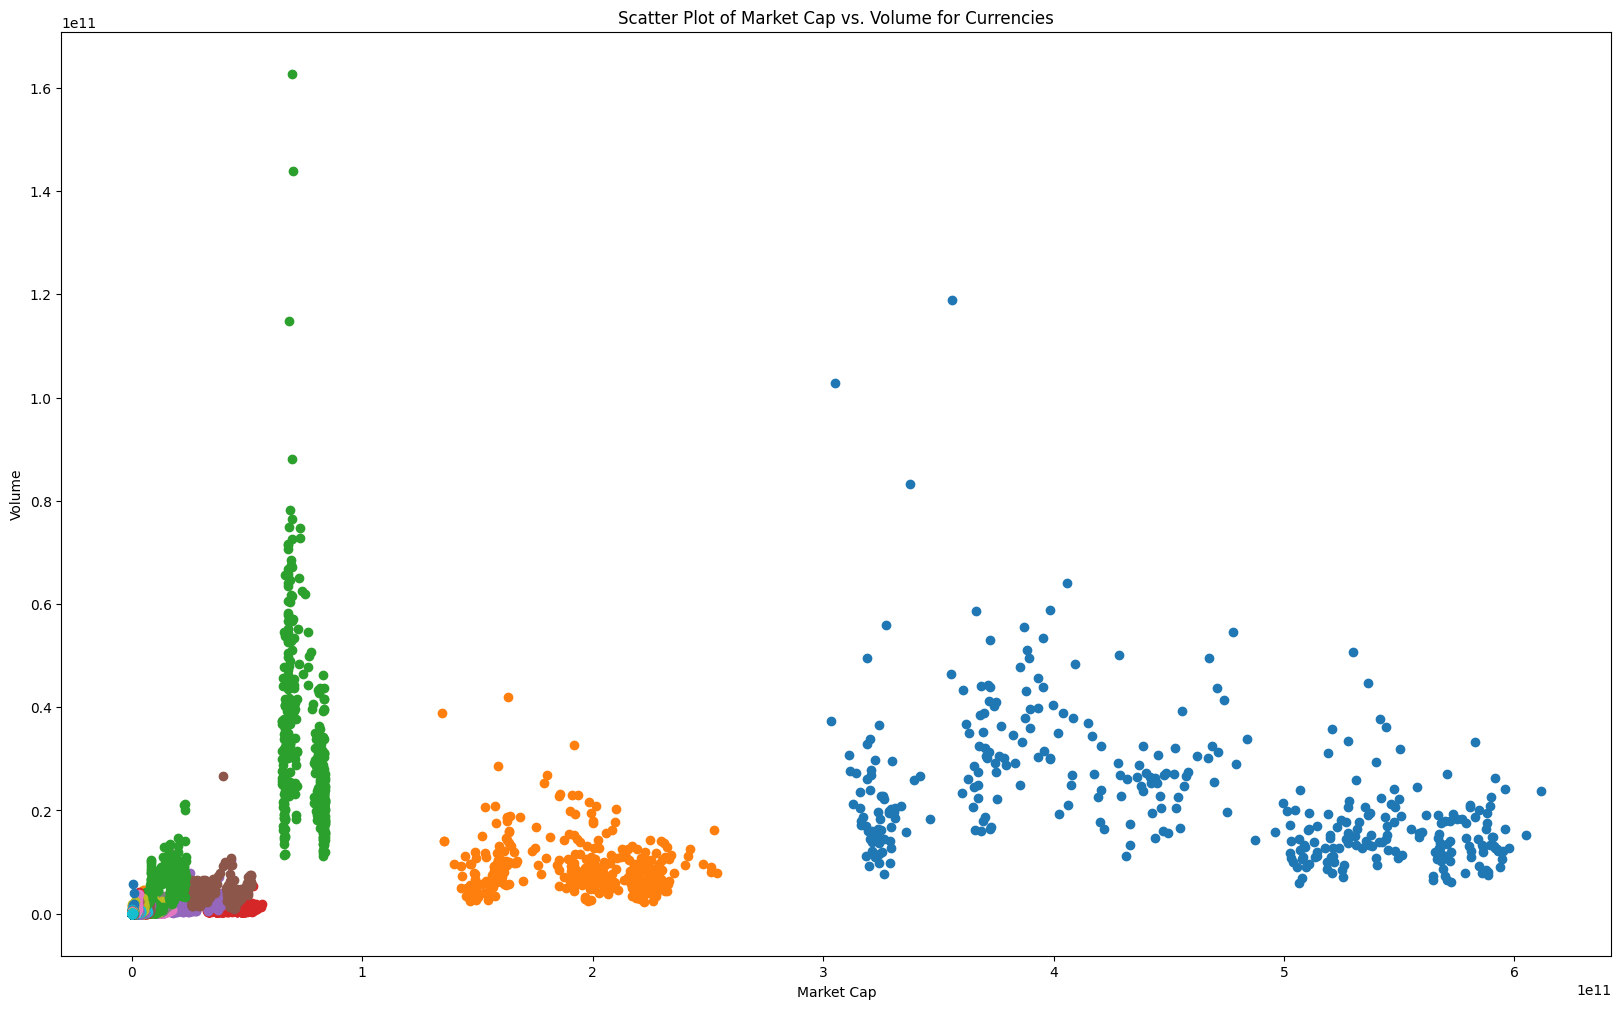

In [123]:
# Initialize the scatter plot
plt.figure(figsize=(20, 12))

# Plot each currency's data point
for index, row in df.iterrows():
    plt.scatter(row['marketCap'], row['volume'], label=row['Name'])

# Set plot labels and title
plt.xlabel('Market Cap')
plt.ylabel('Volume')
plt.title('Scatter Plot of Market Cap vs. Volume for Currencies')

# Show the plot
plt.show()

Part 2 (Done)

In [162]:
currencies = Session.query(Currency.id, Currency.Name)
currencies_with_data = []

for currency in currencies:
    close_values = [
        currency_history.close
        for currency_history in Session.query(CurrenciesHistory.close)
        .filter(CurrenciesHistory.currency_id == currency.id)
    ]
    open_values = [
        currency_history.open
        for currency_history in Session.query(CurrenciesHistory.open)
        .filter(CurrenciesHistory.currency_id == currency.id)
    ]
    date_values = [
        str(currency_history.timeOpen).split()[0]
        for currency_history in Session.query(CurrenciesHistory.timeOpen)
        .filter(CurrenciesHistory.currency_id == currency.id)
    ]

    # Calculate 'diff' values for each currency
    diff_values = [1 if close > open else -1 for close, open in zip(close_values, open_values)]

    currency_data = {
        'Name': currency.Name,
        'diff': diff_values,
    }
    currencies_with_data.append(currency_data)

# Create a DataFrame
df = pd.DataFrame(currencies_with_data)

# Print the DataFrame
print(df)

                  Name                                               diff
0              Bitcoin  [1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1,...
1             Ethereum  [-1, 1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, -...
2          Tether USDt  [-1, 1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, ...
3                  BNB  [-1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, ...
4                  XRP  [1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1,...
..                 ...                                                ...
195           PlayDapp  [1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1...
196      Pundi X (New)  [-1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1...
197  Vulcan Forged PYR  [1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1...
198             Status  [-1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -...
199                Amp  [-1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -...

[200 rows x 2 columns]


In [171]:
# Initialize a dictionary to keep track of aligned days for each pair
aligned_days = {}

# Iterate through the DataFrame to find aligned days for cryptocurrency pairs
for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        if i < j:  # Avoid duplicate pairs
            pair = (row1['Name'], row2['Name'])  # Keep the original order
            diff1 = row1['diff']
            diff2 = row2['diff']

            # Calculate the number of aligned days (both have the same change)
            aligned_count = sum(1 for d1, d2 in zip(diff1, diff2) if d1 == d2 == 1 or d1 == d2 == -1)

            # Update the aligned days for the pair
            if pair in aligned_days:
                aligned_days[pair] += aligned_count
            else:
                aligned_days[pair] = aligned_count

# Sort the results by aligned days (descending order), currency names, and pair names
sorted_pairs = sorted(
    aligned_days.items(),
    key=lambda item: (-item[1], item[0][0], item[0][1]),
)

# Display the top 30 cryptocurrency pairs
top_pairs = sorted_pairs[:30]

# Print the results with the desired format (both currencies and aligned days)
for pair, days in top_pairs:
    name_1, name_2 = pair
    print(f"Aligned Days: {days}, Currency Pair: {name_1}-{name_2}")

Aligned Days: 351, Currency Pair: Bitcoin-Wrapped Bitcoin
Aligned Days: 323, Currency Pair: The Sandbox-Decentraland
Aligned Days: 318, Currency Pair: Ethereum-Gnosis
Aligned Days: 317, Currency Pair: The Sandbox-Enjin Coin
Aligned Days: 313, Currency Pair: Ethereum-Wrapped Bitcoin
Aligned Days: 311, Currency Pair: Axie Infinity-The Sandbox
Aligned Days: 311, Currency Pair: Decentraland-Oasis Network
Aligned Days: 310, Currency Pair: Axie Infinity-Decentraland
Aligned Days: 309, Currency Pair: VeChain-Decentraland
Aligned Days: 308, Currency Pair: Bitcoin-Ethereum
Aligned Days: 308, Currency Pair: Decentraland-Enjin Coin
Aligned Days: 308, Currency Pair: The Sandbox-Oasis Network
Aligned Days: 308, Currency Pair: Zilliqa-Ankr
Aligned Days: 307, Currency Pair: Axie Infinity-Oasis Network
Aligned Days: 307, Currency Pair: BNB-PancakeSwap
Aligned Days: 307, Currency Pair: Basic Attention Token-Ontology
Aligned Days: 307, Currency Pair: The Sandbox-ICON
Aligned Days: 307, Currency Pair: Ve

Part 3 (Done)

C:\Users\Pooriya\AppData\Local\Temp\ipykernel_17564\2016398260.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 5))


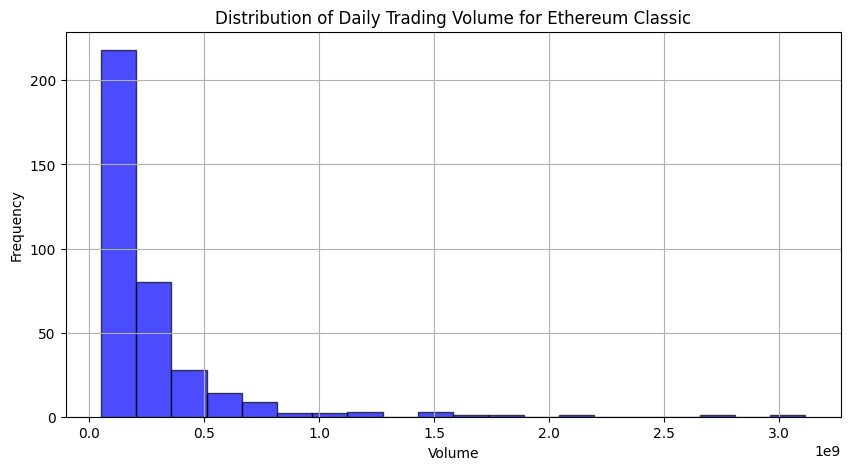

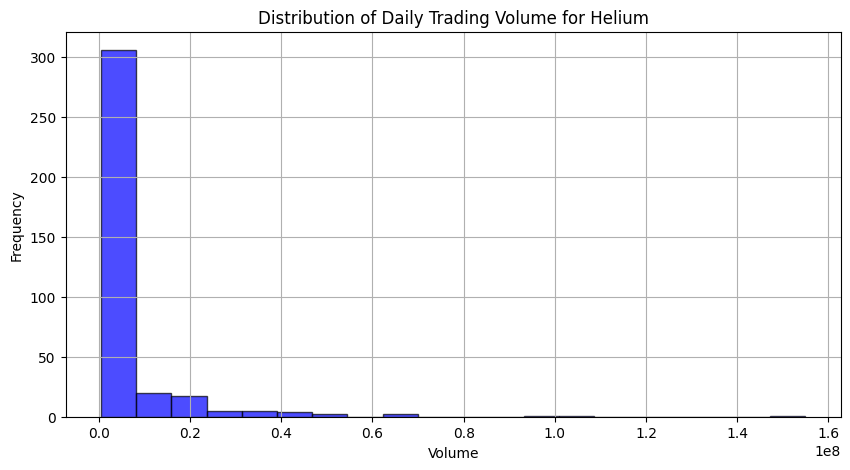

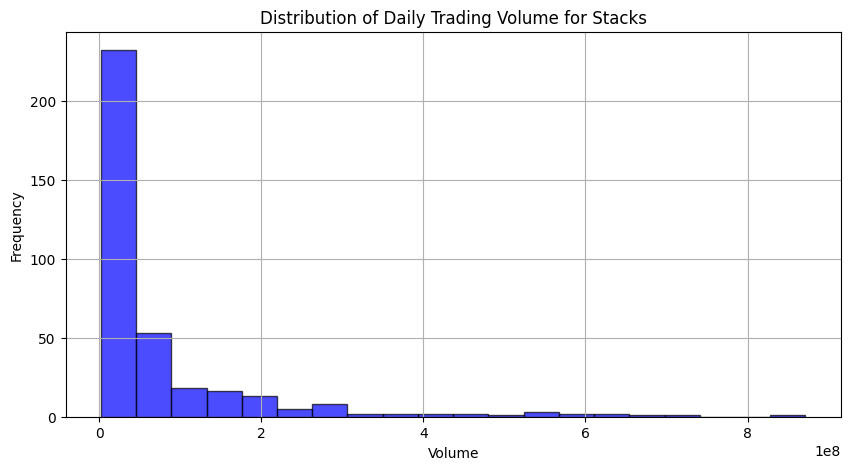

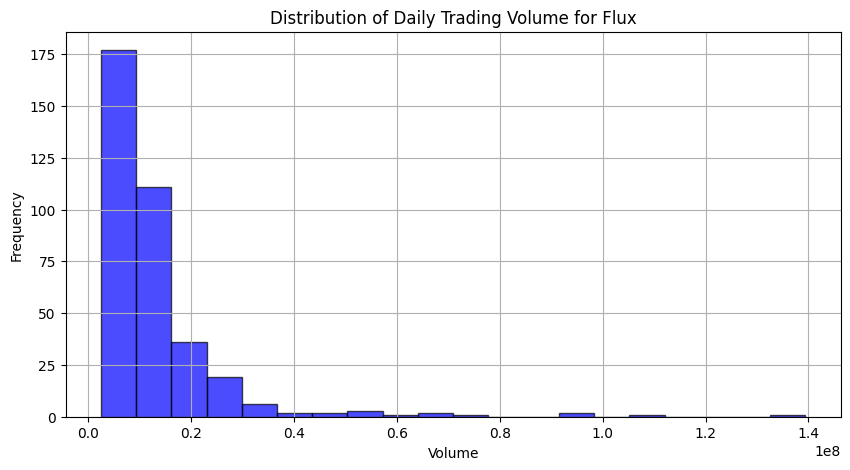

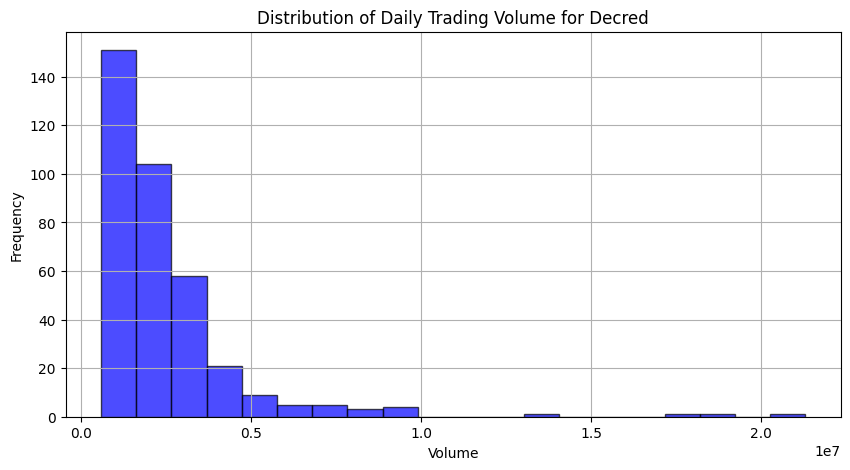

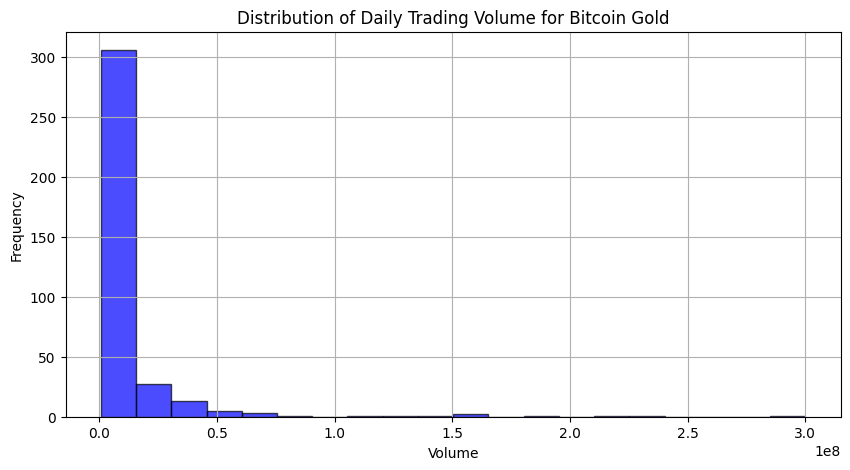

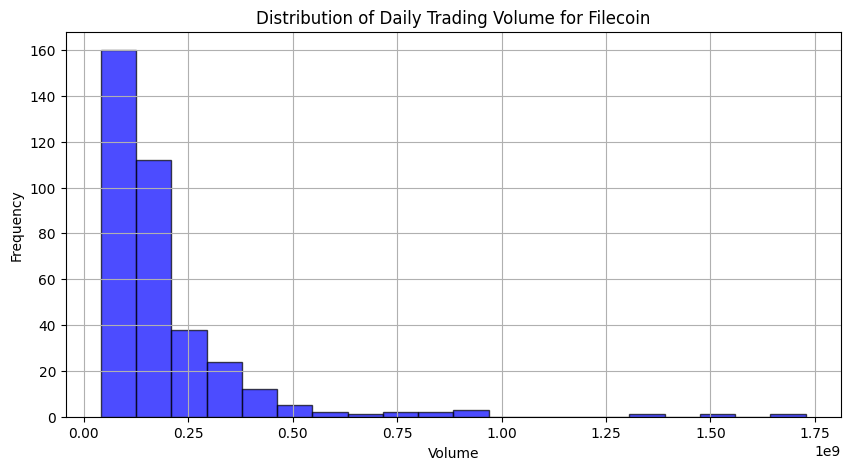

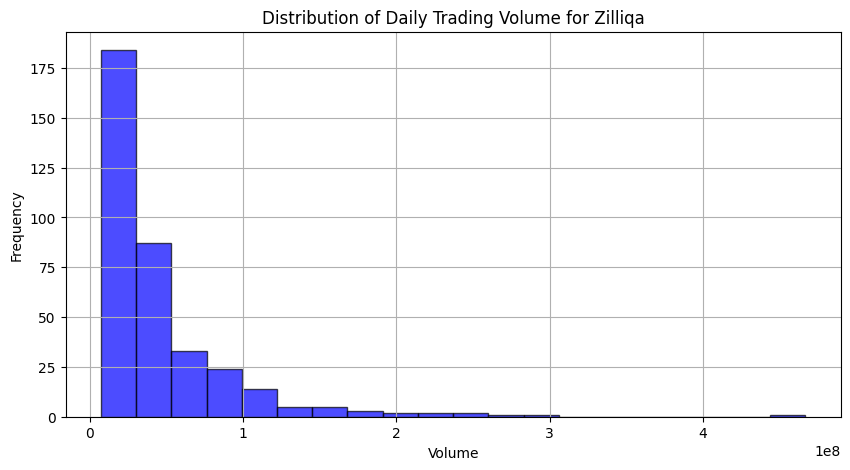

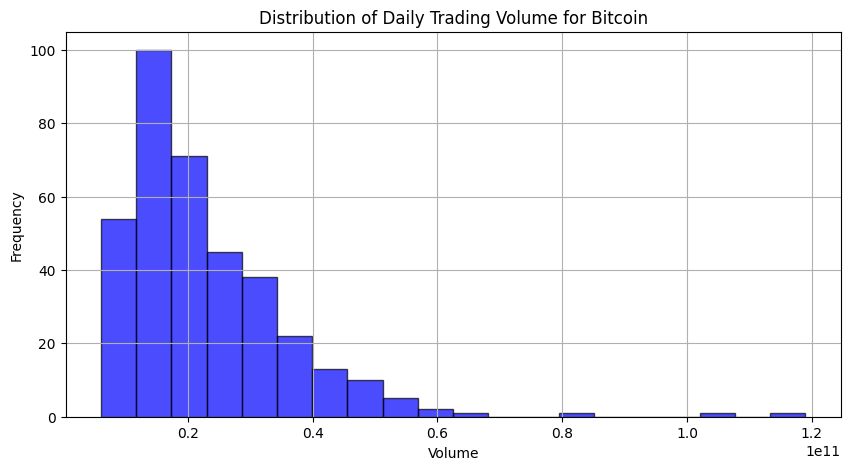

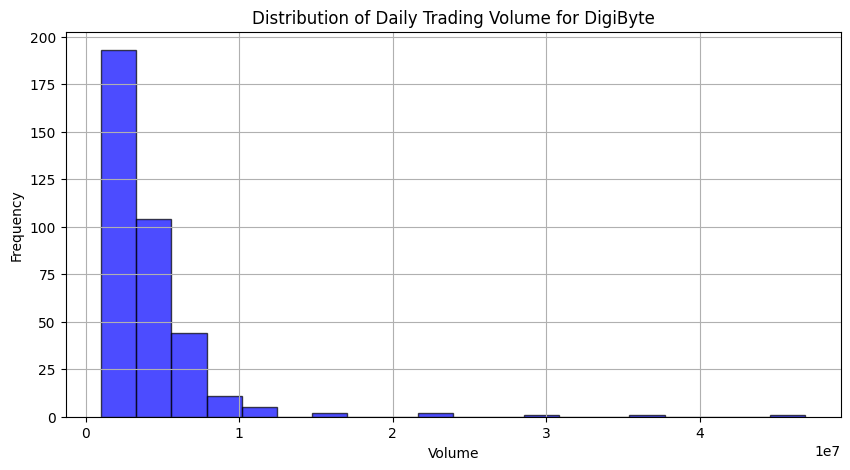

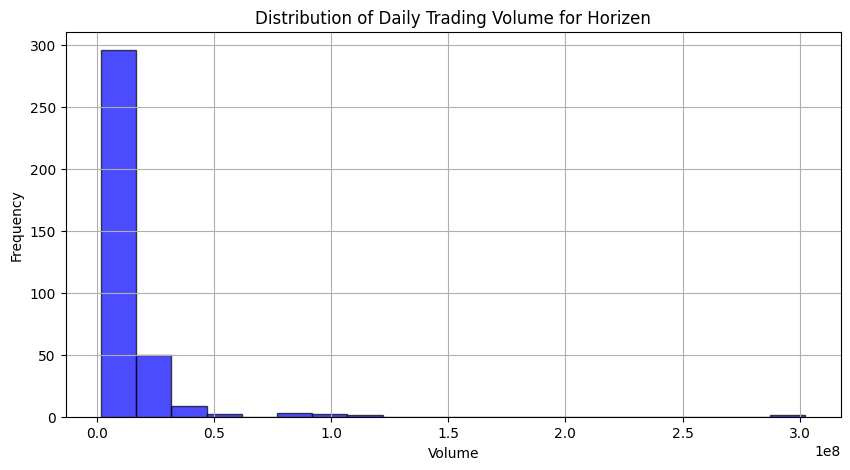

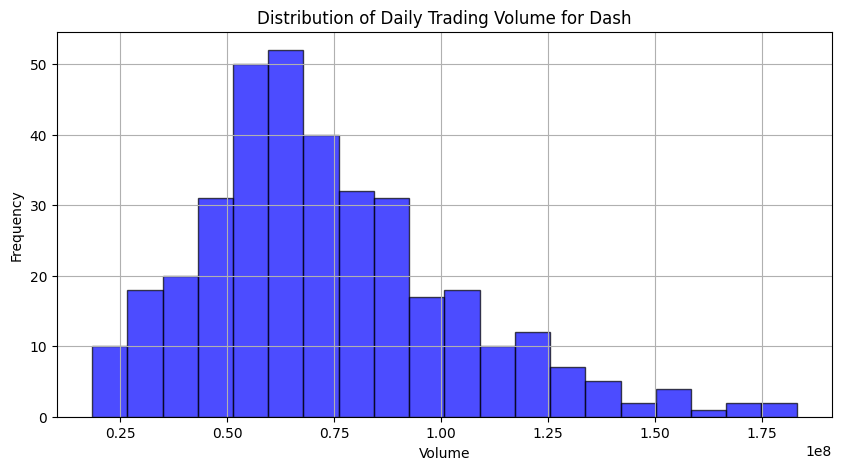

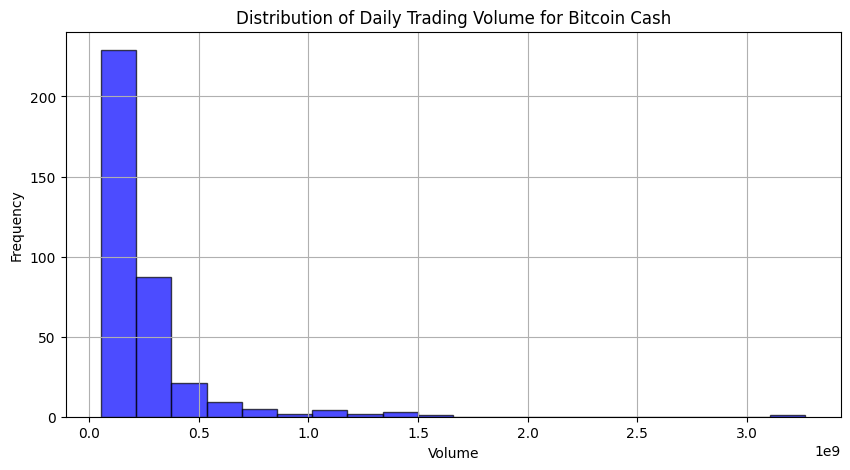

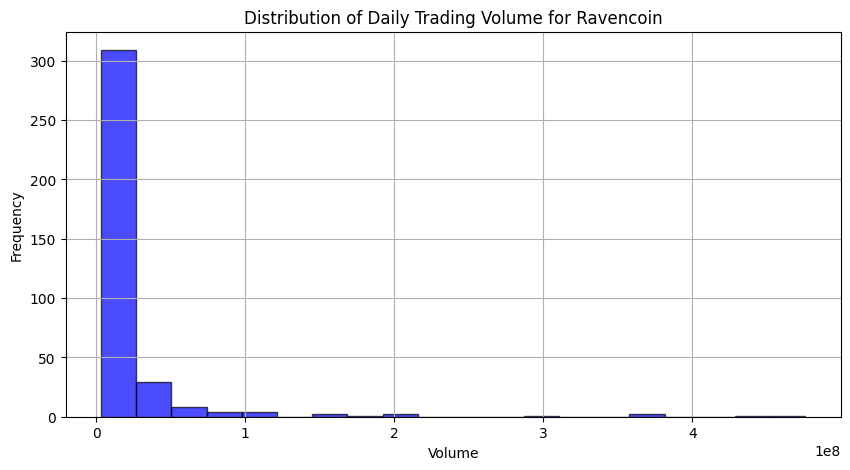

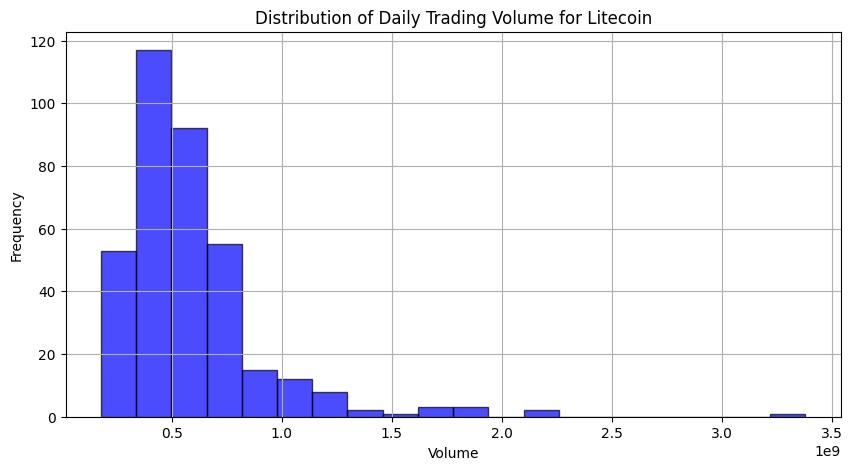

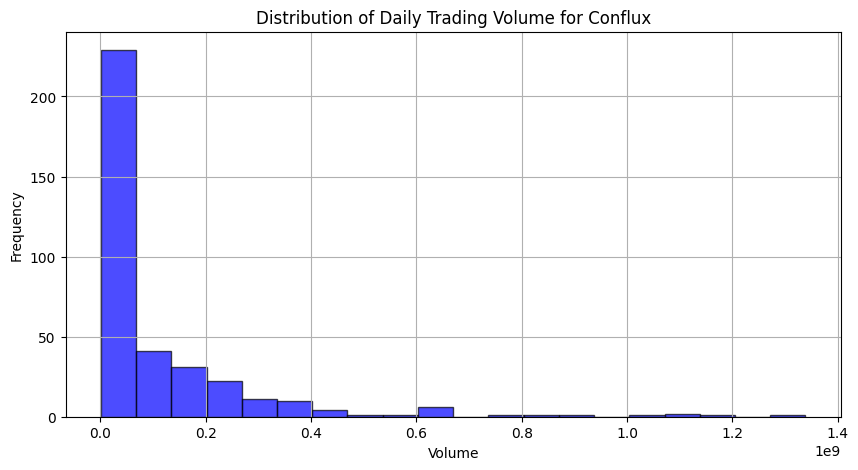

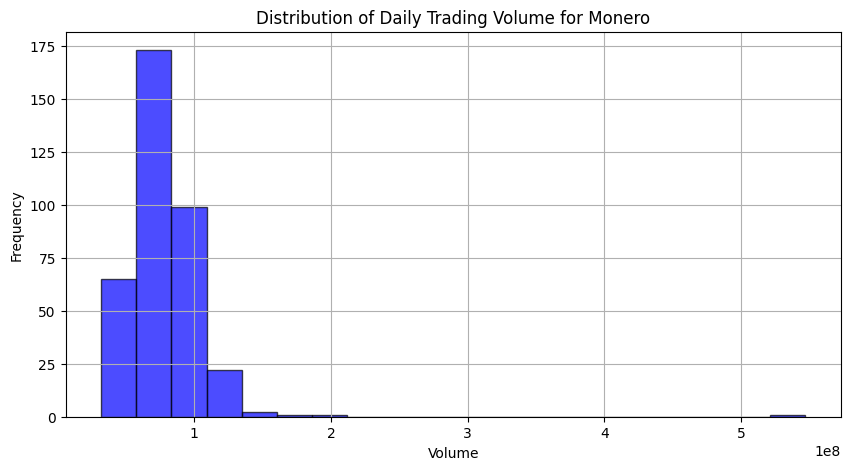

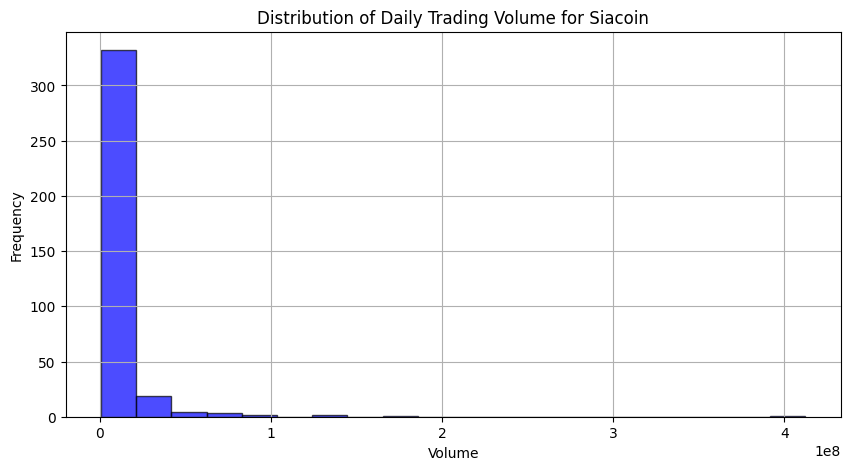

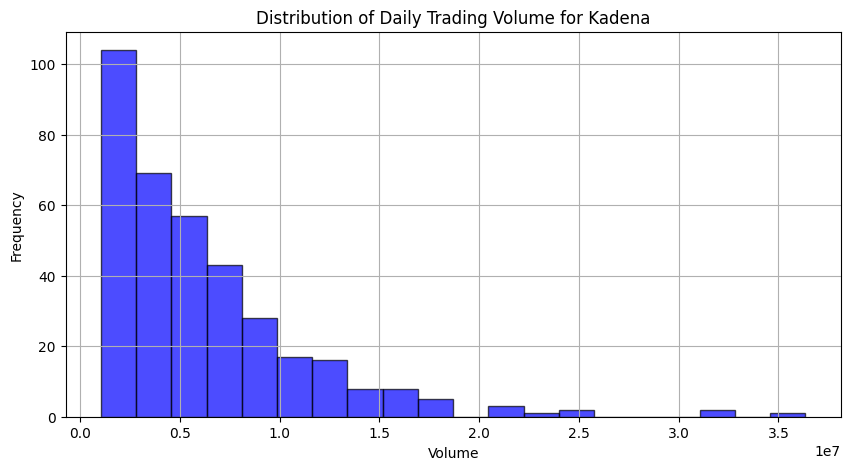

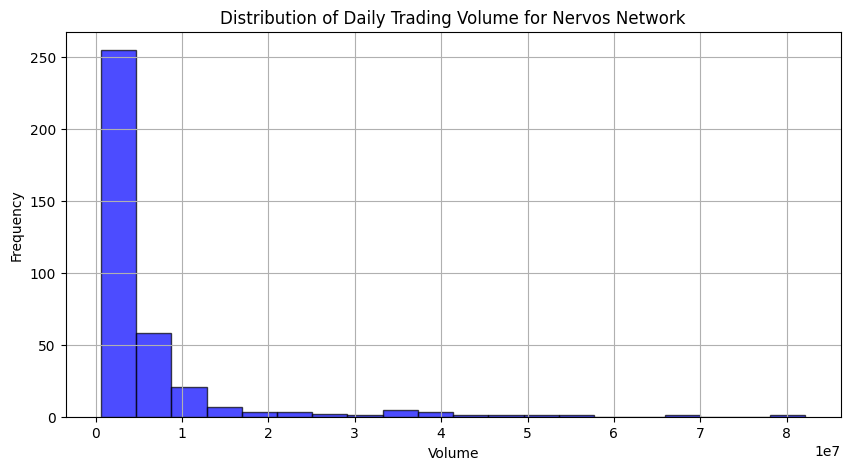

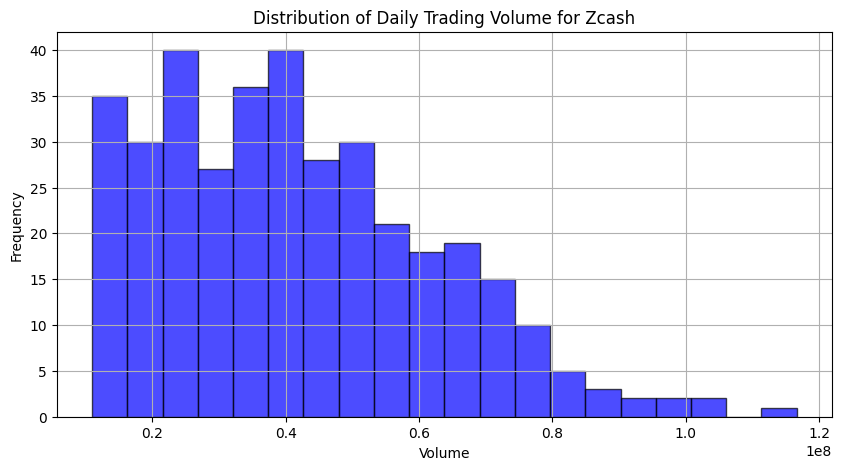

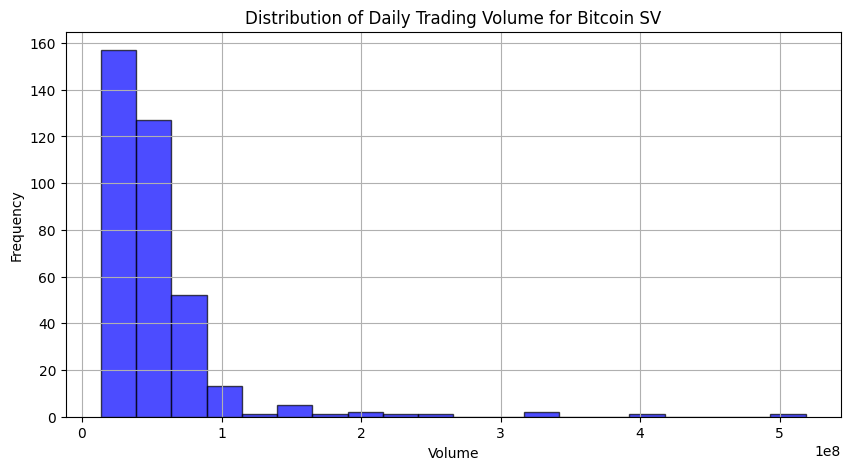

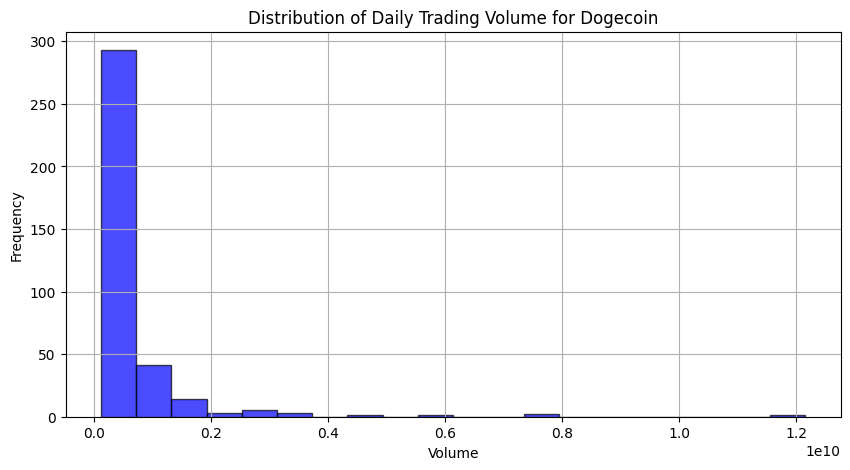

In [173]:

currencies = Session.query(Currency).filter(Currency.tags.any(Tag.tag == 'Mineable')).all()

currencies_with_volume = []

for currency in currencies:
    currency_data = {
        'Cryptocurrency': currency.Name,
        'Volume': [
            currency_history.volume
            for currency_history in Session.query(CurrenciesHistory.volume)
            .filter(CurrenciesHistory.currency_id == currency.id)
        ],
    }
    currencies_with_volume.append(currency_data)

# Create a DataFrame
df = pd.DataFrame(currencies_with_volume)

# Iterate through the DataFrame and plot the distribution for each cryptocurrency
for _, row in df.iterrows():
    cryptocurrency = row['Cryptocurrency']
    volume_data = row['Volume']

    # Create a histogram or plot
    plt.figure(figsize=(10, 5))
    plt.hist(volume_data, bins=20, alpha=0.7, color='b', edgecolor='k')
    plt.title(f'Distribution of Daily Trading Volume for {cryptocurrency}')
    plt.xlabel('Volume')
    plt.ylabel('Frequency')
    plt.grid(True)
    
    # Show or save the plot
plt.show()  # Uncomment to display the plot

Part 4

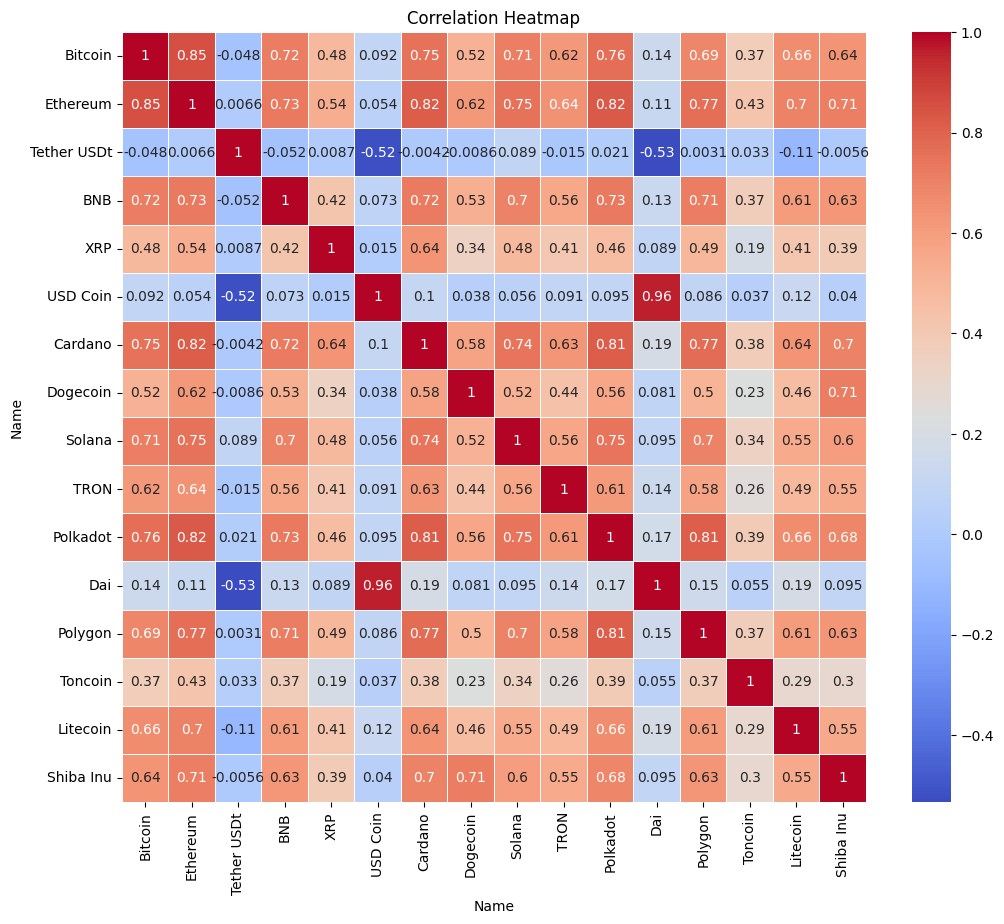

In [177]:
# Query the currencies and their historical data
currencies = Session.query(Currency.id, Currency.Name).limit(16)
currencies_with_data = []

for currency in currencies:
    close_values = [
        currency_history.close
        for currency_history in Session.query(CurrenciesHistory.close)
        .filter(CurrenciesHistory.currency_id == currency.id)
    ]
    open_values = [
        currency_history.open
        for currency_history in Session.query(CurrenciesHistory.open)
        .filter(CurrenciesHistory.currency_id == currency.id)
    ]
    
    # Calculate 'PriceChange' by subtracting 'open' from 'close'
    price_change = [close - open for close, open in zip(close_values, open_values)]

    currency_data = {
        'Name': currency.Name,
        'PriceChange': price_change,  # Add the 'PriceChange' column
    }
    currencies_with_data.append(currency_data)

# Create a DataFrame
df = pd.DataFrame(currencies_with_data)

# Create an empty correlation matrix
correlation_matrix = pd.DataFrame(index=df['Name'], columns=df['Name'])

# Compute the correlation between PriceChange lists and fill the matrix
for i, row1 in enumerate(df['PriceChange']):
    for j, row2 in enumerate(df['PriceChange']):
        corr = pd.Series(row1).corr(pd.Series(row2))
        correlation_matrix.iloc[i, j] = corr

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Part 5

In [ ]:
# Sample data (replace with your actual data)
np.random.seed(0)
cryptocurrencies = ["BTC", "ETH", "LTC", "XRP", "BCH", "ADA", "DOT", "LINK", "XLM", "BNB"]
num_days = 90  # Spring 2023 (March, April, and May, assuming 3 months)

crypto_data = {
    "Date": pd.date_range(start="2023-03-01", periods=num_days, freq="D"),
}

# Simulate price changes, 1 indicates price increase, 0 indicates no change or decrease
for crypto in cryptocurrencies:
    crypto_data[f"{crypto}_PriceChange"] = np.random.choice([0, 1], size=num_days, p=[0.65, 0.35])

# Define red days (more than 35% of cryptocurrencies had price increases)
threshold = int(len(cryptocurrencies) * 0.35)
price_change_columns = [f"{crypto}_PriceChange" for crypto in cryptocurrencies]
crypto_data["RedDay"] = (crypto_data[price_change_columns].sum(axis=1) > threshold)

# Filter data for red days during March, April, and May
spring_months = [3, 4, 5]
red_days_data = crypto_data[crypto_data["RedDay"] & crypto_data["Date"].dt.month.isin(spring_months)]

# Calculate the number of price increases for each cryptocurrency during red days
price_increase_counts = red_days_data[price_change_columns].sum()
top_10_cryptos = price_increase_counts.nlargest(10)

# Retrieve market volume data (replace with your actual market volume data)
market_volume_data = {
    "Cryptocurrency": cryptocurrencies,
    "MarketVolume": np.random.randint(1000000, 10000000, len(cryptocurrencies))
}

market_volume_df = pd.DataFrame(market_volume_data)

# Filter market volume data for the top 10 cryptocurrencies
top_10_market_volume = market_volume_df[market_volume_df["Cryptocurrency"].isin(top_10_cryptos.index)]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_market_volume["Cryptocurrency"], top_10_market_volume["MarketVolume"])
plt.title("Market Volume of Top 10 Cryptocurrencies with Most Price Increases on Red Days (Spring 2023)")
plt.xlabel("Cryptocurrency")
plt.ylabel("Market Volume")
plt.xticks(rotation=45)
plt.grid(True)

# Show the bar chart
plt.show()

TypeError: ignored

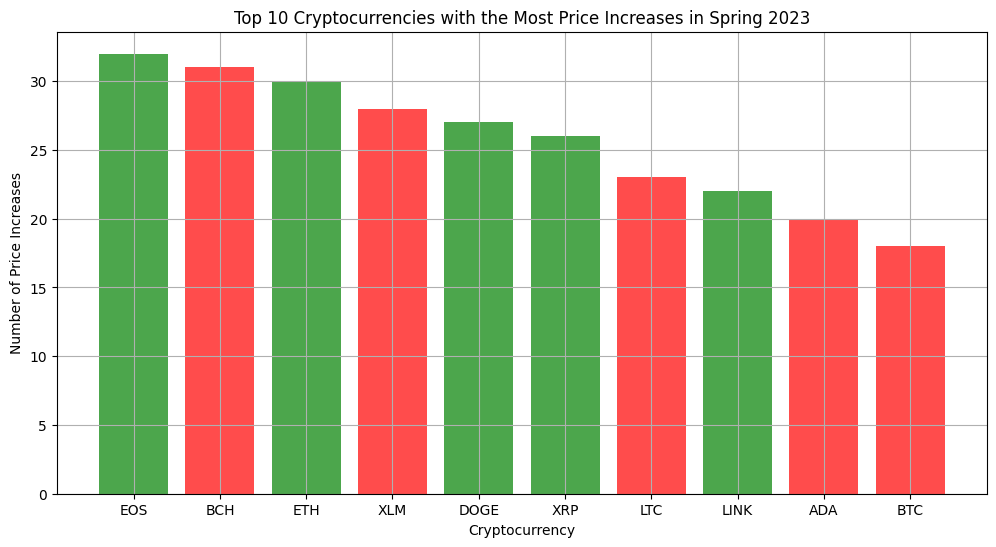

In [ ]:
# Generate random data for cryptocurrencies
np.random.seed(0)
num_days = 90  # Number of days in spring 2023
cryptos = ['BTC', 'ETH', 'LTC', 'XRP', 'ADA', 'XLM', 'DOGE', 'BCH', 'EOS', 'LINK']  # Sample cryptocurrencies
crypto_data = {crypto: np.random.randint(-1, 2, num_days) for crypto in cryptos}

# Create a DataFrame with random data
date_range = pd.date_range(start='2023-03-01', periods=num_days, freq='D')
df = pd.DataFrame(crypto_data, index=date_range)

# Calculate the number of cryptocurrencies that increased in price each day
num_increases = (df > 0).sum(axis=1)

# Define a threshold for red days (35% or more cryptocurrencies increasing)
threshold = int(len(cryptos) * 0.35)

# Identify red days
red_days = num_increases[num_increases >= threshold].index

# Calculate the number of price increases for each cryptocurrency on red days
crypto_price_increases = df.loc[red_days].apply(lambda x: (x > 0).sum())

# Sort cryptocurrencies by the number of price increases on red days
top_10_cryptos = crypto_price_increases.nlargest(10)

# Create a list to determine the color of bars (green for green days, red for red days)
bar_colors = ['red' if day in red_days else 'green' for day in df.index]

# Create a bar chart with colored bars
plt.figure(figsize=(12, 6))
plt.bar(top_10_cryptos.index, top_10_cryptos, color=bar_colors[:10], alpha=0.7)
plt.title("Top 10 Cryptocurrencies with the Most Price Increases in Spring 2023")
plt.xlabel("Cryptocurrency")
plt.ylabel("Number of Price Increases")
plt.grid(True)

# Show the plot
plt.show()

# تخمین
(Done)

In [58]:
num_currencies_to_select = 40

# Get the total number of available currencies
total_currencies = Session.query(Currency).count()

# Generate a list of 40 unique random indices
random_indices = random.sample(range(total_currencies), num_currencies_to_select)

# Query the randomly selected currencies and their volumes
selected_currencies = (
    Session.query(Currency.id, Currency.Name)
    .filter(Currency.id.in_(random_indices))
    .all()
)

currencies_with_volume = []

for currency in selected_currencies:
    currency_data = {
        'Cryptocurrency': currency.Name,
        'Volume': [
            currency_history.volume
            for currency_history in Session.query(CurrenciesHistory.volume)
            .filter(CurrenciesHistory.currency_id == currency.id)
        ],
    }
    currencies_with_volume.append(currency_data)

# Create a DataFrame
df = pd.DataFrame(currencies_with_volume)

# Explode the Volume list to separate rows
df = df.explode('Volume')

# Convert Volume column to numeric (in case it's not)
df['Volume'] = pd.to_numeric(df['Volume'])

# Calculate the mean for each currency
mean_volume_by_currency = df.groupby('Cryptocurrency')['Volume'].mean().reset_index()

# Print the DataFrame
print(mean_volume_by_currency)

       Cryptocurrency        Volume
0             Arweave  2.200274e+07
1       Axie Infinity  8.216049e+07
2            Biconomy  5.795715e+06
3             Bitcoin  2.288578e+10
4             Cartesi  1.432612e+07
5                Chia  5.611175e+06
6            Compound  4.135776e+07
7             Conflux  1.082191e+08
8      Convex Finance  8.354164e+06
9     Curve DAO Token  7.012388e+07
10           DigiByte  4.106888e+06
11                EOS  1.575340e+08
12         Enjin Coin  2.879936e+07
13           Ethereum  8.809883e+09
14         Frax Share  2.799553e+07
15               Holo  1.858344e+07
16          Immutable  2.920697e+07
17  Internet Computer  3.604835e+07
18           Loopring  4.146889e+07
19              MAGIC  5.377934e+07
20           MX TOKEN  3.015529e+06
21               Nexo  6.298632e+06
22      Oasis Network  2.844184e+07
23         Pax Dollar  1.455462e+07
24              Quant  3.543574e+07
25          Ravencoin  2.240339e+07
26     Reserve Rights  1.543

In [59]:
# Confidence level (e.g., 98%)
confidence_level = 0.98

# Calculate Z-score for the given confidence level
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate margin of error
sample_mean = np.mean(mean_volume_by_currency['Volume'])
sample_std = np.std(mean_volume_by_currency['Volume'])
standard_error = sample_std / np.sqrt(num_currencies_to_select)
margin_of_error = z_score * standard_error

# Calculate confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Display the results
print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std}")
print(f"Confidence Interval (98%): ({lower_bound}, {upper_bound})")

Sample Mean: 839430738.0443681
Sample Standard Deviation: 3786275120.660531
Confidence Interval (98%): (-553266871.7242426, 2232128347.8129787)


# آزمون فرض

Part 1

In [4]:
# Convert the timestamp string to a datetime object
# timeOpen = datetime.strptime("2023-08-25 00:00:00", "%Y-%m-%d %H:%M:%S")

# Query the currencies and their historical data
currencies = Session.query(Currency.id, Currency.Name)
currencies_with_market = []

for currency in currencies:
    close_values = [
        currency_history.close
        for currency_history in Session.query(CurrenciesHistory.close).filter(
            CurrenciesHistory.currency_id == currency.id
        )
        # .filter(CurrenciesHistory.timeOpen == timeOpen)
    ]

    open_values = [
        currency_history.open
        for currency_history in Session.query(CurrenciesHistory.open).filter(
            CurrenciesHistory.currency_id == currency.id
        )
        # .filter(CurrenciesHistory.timeOpen == timeOpen)
    ]

    # Calculate 'PriceChange' by subtracting 'open' from 'close'
    price_change = [close - open for close, open in zip(close_values, open_values)]

    timeopen = (
        [
            currency_history.timeOpen
            for currency_history in Session.query(CurrenciesHistory.timeOpen).filter(
                CurrenciesHistory.currency_id == currency.id
            )
        ]
    )

    currency_data = {
        "Name": currency.Name,
        "timeOpen": timeopen,
        "PriceChange": price_change,  # Add the 'PriceChange' column
    }

    currencies_with_market.append(currency_data)

# Create a DataFrame
df3 = pd.DataFrame(currencies_with_market)

df3["weekday_mean"] = 0
df3["weekend_mean"] = 0

for index, row in df3.iterrows():
    coin_weekend_mean = 0
    coin_weekday_mean = 0
    for change, odate in zip(row["PriceChange"], row["timeOpen"]):
        print(odate.weekday())
    exit

6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4
3
2
1
0
6
5
4


Part 2 (Done)

In [84]:
# Query the currencies and their volumes
currencies = Session.query(Currency.id, Currency.Name)
currencies_with_volume = []

for currency in currencies:
    currency_data = {
        'Cryptocurrency': currency.Name,
        'Volume': [
            currency_history.volume
            for currency_history in Session.query(CurrenciesHistory.volume)
            .filter(CurrenciesHistory.currency_id == currency.id)
        ],
    }
    currencies_with_volume.append(currency_data)

# Create a DataFrame
df = pd.DataFrame(currencies_with_volume)

# Explode the Volume list to separate rows
df = df.explode('Volume')

# Convert Volume column to numeric (in case it's not)
df['Volume'] = pd.to_numeric(df['Volume'])

# Calculate the mean for each currency
grouped_df = df.groupby('Cryptocurrency')['Volume'].mean().reset_index()

# Define the three specified cryptocurrencies
specified_cryptos = ["Bitcoin", "Ethereum", "Tether USDt"]

# Separate data into specified cryptocurrencies and others
specified_crypto_data = grouped_df[grouped_df["Cryptocurrency"].isin(specified_cryptos)]
other_crypto_data = grouped_df[~grouped_df["Cryptocurrency"].isin(specified_cryptos)]

# Calculate the average daily trading volume for specified cryptocurrencies and others
average_volume_specified = specified_crypto_data["Volume"].mean()
average_volume_other = other_crypto_data["Volume"].mean()

# Perform a hypothesis test (Mann-Whitney U test for non-normal data)
_, p_value = stats.mannwhitneyu(specified_crypto_data["Volume"], other_crypto_data["Volume"])

# Define the significance level (alpha)
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("The claim is supported. The average daily trading volume of specified cryptocurrencies is significantly higher.")
else:
    print("The claim is not supported. There is no significant difference in average daily trading volume.")

# Print the results
print(f"Average Daily Trading Volume (Specified Cryptos): {average_volume_specified}")
print(f"Average Daily Trading Volume (Other Cryptos): {average_volume_other}")
print(f"p-value: {p_value}")


The claim is supported. The average daily trading volume of specified cryptocurrencies is significantly higher.
Average Daily Trading Volume (Specified Cryptos): 21586381993.680405
Average Daily Trading Volume (Other Cryptos): 123286405.64326608
p-value: 1.5227653418608193e-06


#آمتیازی

In [141]:
# Query the currencies and their historical data
currencies = Session.query(Currency.id, Currency.Name)
currencies_with_data = []

for currency in currencies:
    close_values = [
        currency_history.close
        for currency_history in Session.query(CurrenciesHistory.close)
        .filter(CurrenciesHistory.currency_id == currency.id)
    ]
    open_values = [
        currency_history.open
        for currency_history in Session.query(CurrenciesHistory.open)
        .filter(CurrenciesHistory.currency_id == currency.id)
    ]
    time = [
        currency_history.timeOpen
        for currency_history in Session.query(CurrenciesHistory.timeOpen )
        .filter(CurrenciesHistory.currency_id == currency.id)
        
    ]
    # Calculate 'PriceChange' by subtracting 'open' from 'close'
    price_change = [close - open for close, open in zip(close_values, open_values)]

    currency_data = {
        'Name': currency.Name,
        'PriceChange': price_change,  # Add the 'PriceChange' column
        'Date': time
    }
    currencies_with_data.append(currency_data)

# Create a DataFrame
df = pd.DataFrame(currencies_with_data)
df

,Name,PriceChange,Date
0,Bitcoin,"[100.09455990720016, 67.88853108290277, -133.2...","[2023-09-03 00:00:00, 2023-09-02 00:00:00, 202..."
1,Ethereum,"[-0.9258863608001775, 8.46568324670011, -17.09...","[2023-09-03 00:00:00, 2023-09-02 00:00:00, 202..."
2,Tether USDt,"[-4.442200000009944e-05, 0.0004323890999999857...","[2023-09-03 00:00:00, 2023-09-02 00:00:00, 202..."
3,BNB,"[-0.05487581970001543, 0.8216298449000021, -2....","[2023-09-03 00:00:00, 2023-09-02 00:00:00, 202..."
4,XRP,"[0.005940446499999974, 0.0010315428999999599, ...","[2023-09-03 00:00:00, 2023-09-02 00:00:00, 202..."
...,...,...,...
195,PlayDapp,"[0.0008941684000000061, 0.0009665378000000002,...","[2023-09-03 00:00:00, 2023-09-02 00:00:00, 202..."
196,Pundi X (New),"[-0.00284949109999999, 0.014040231299999983, -...","[2023-09-03 00:00:00, 2023-09-02 00:00:00, 202..."
197,Vulcan Forged PYR,"[0.5812749061, 0.011215557499999917, -0.152421...","[2023-09-03 00:00:00, 2023-09-02 00:00:00, 202..."
198,Status,"[-1.5773199999999377e-05, 0.000281581799999999...","[2023-09-03 00:00:00, 2023-09-02 00:00:00, 202..."
